In [27]:
import numpy as np
import logging
import sys
from matplotlib import pyplot as plt

%matplotlib inline
logging.basicConfig(
    format="%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)
sys.path.append("../")

import torch
from torch.nn import MSELoss
from torchvision.datasets import MNIST
from torchvision import transforms

from aef.models.aef import Autoencoder
from aef.trainer import AutoencoderTrainer


## Data

In [28]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist = MNIST('./data', download=True, transform=img_transform)

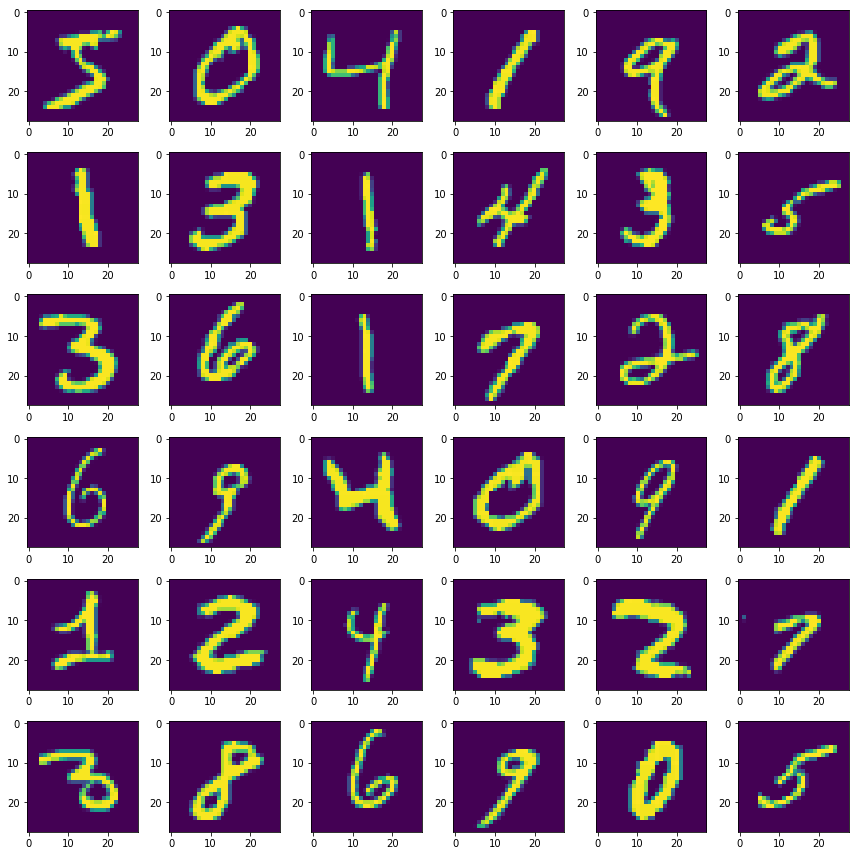

In [29]:
fig = plt.figure(figsize=(12,12))

for i in range(36):
    ax = plt.subplot(6, 6, i + 1)
    img, _ = mnist[i]
    plt.imshow(img.reshape((28,28)))
        
plt.tight_layout()
plt.show()

## Model, losses, trainer

In [30]:
ae = Autoencoder()

In [31]:
def log_p(x_pred, x_true, log_p):
    return log_p


def mse(x_pred, x_true, log_p):
    return MSELoss()(x_pred, x_true)


In [32]:
trainer = AutoencoderTrainer(ae)

## Train

In [33]:
trainer.train(
    dataset=mnist,
    loss_functions=[mse, log_p],
    loss_weights=[1., 1.],
    loss_labels=["MSE", "log p"],
)

AttributeError: 'AutoencoderTrainer' object has no attribute 'make_dataloader'